In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random


2022-03-03 09:59:35.113699: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 09:59:35.113987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data'

In [5]:
number = 10
str(number).zfill(4)

'0010'

In [6]:
def get_dataset(path, sample_size=500, image_size=(64,64), random_seed=1):
    """
    get a dataset of images of required size, randomly selected
    returns X (masked images), y (unmasked images of the same faces), and a sample test set of 5 images
    path to data : ..../raw_data
    the function then completes the path by adding : 64x64/Mask or No_mask (or 256x256/Mask etc.)
    """
    path = f'{path}/{image_size[0]}x{image_size[1]}/'
    print(f'Loading data from {path}...')
    random.seed(random_seed)
    data_size = sample_size
    X = []
    y = []
    X_test = []
    for number in range(data_size):
        rand_img_nb = random.randint(0,9999)
        no_mask_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X.append(mask_im)
        y.append(no_mask_im)
    for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_test.append(mask_im)
    X=np.asarray(X)
    y=np.asarray(y)
    X_test=np.asarray(X_test)
    print('Done')
    print(f'X shape : {X.shape}')
    print(f'y shape : {y.shape}')
    print(f'X_test shape : {X_test.shape}')
    return X, y, X_test

In [7]:
X, y, X_test = get_dataset(path, sample_size= 100, image_size=(64,64), random_seed=5)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape : (100, 64, 64, 3)
y shape : (100, 64, 64, 3)
X_test shape : (5, 64, 64, 3)


<IPython.core.display.Javascript object>


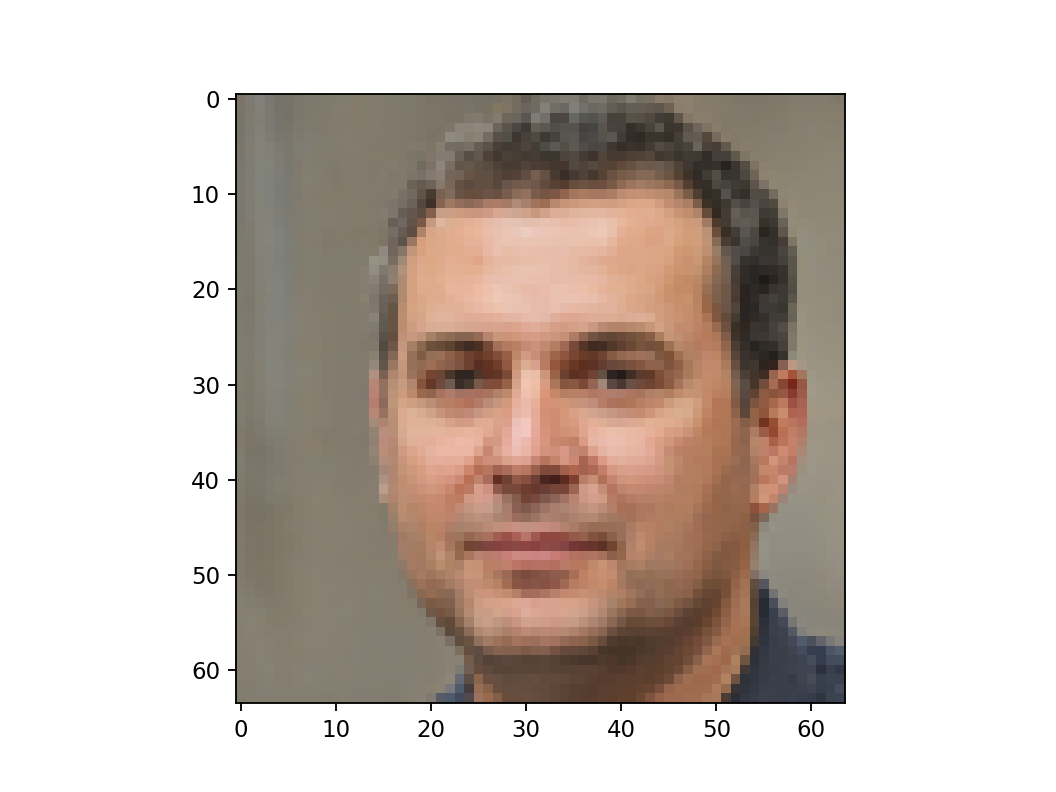

In [8]:
plt.imshow(X_test[0])

In [11]:
plt.imshow(X[20])

In [12]:
plt.imshow(y[20])

In [13]:
from icangetyoursmile.models import unet

In [14]:
model = unet(input_size=(64,64,3))

2022-03-03 09:59:45.376408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-03 09:59:45.376504: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-03 09:59:45.376519: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-03 09:59:45.377007: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from icangetyoursmile.custom_callbacks import CustomCallback
image_log = dict()
save_predict = CustomCallback(X_test, image_log)

In [16]:
results = model.fit(X, y, batch_size=8, epochs=20, use_multiprocessing=True, callbacks=save_predict)

Epoch 1/20
13/13 [==============================] - 2s 89ms/step - loss: 16378.7617
Epoch 2/20
13/13 [==============================] - 1s 60ms/step - loss: 12072.2285
Epoch 3/20
13/13 [==============================] - 1s 59ms/step - loss: 9460.7305
Epoch 4/20
13/13 [==============================] - 1s 64ms/step - loss: 7892.4146
Epoch 5/20
13/13 [==============================] - 1s 65ms/step - loss: 7102.4121
Epoch 6/20
13/13 [==============================] - 1s 67ms/step - loss: 6470.2871
Epoch 7/20
13/13 [==============================] - 1s 64ms/step - loss: 5963.5718
Epoch 8/20
13/13 [==============================] - 1s 63ms/step - loss: 5530.3013
Epoch 9/20
13/13 [==============================] - 1s 62ms/step - loss: 5132.6895
Epoch 10/20
13/13 [==============================] - 1s 57ms/step - loss: 4731.7168
Epoch 11/20
13/13 [==============================] - 1s 58ms/step - loss: 4347.8296
Epoch 12/20
13/13 [==============================] - 1s 59ms/step - loss: 3983.8623

In [17]:
y_pred = model.predict(X_test).astype(np.uint8)

In [18]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

In [39]:
image_log

{0: array([[[[ 17,  12, 247],
          [ 44,  27, 228],
          [ 50,  28, 218],
          ...,
          [ 63,  35, 206],
          [ 51,  27, 212],
          [ 38,  36, 231]],
 
         [[  3,  25, 247],
          [ 26,  50, 199],
          [ 53,  56, 189],
          ...,
          [ 47,  66, 191],
          [ 59,  60, 189],
          [ 75,  52, 205]],
 
         [[248,  46, 228],
          [ 12,  74, 186],
          [ 64,  92, 139],
          ...,
          [ 20,  87, 189],
          [ 22,  92, 189],
          [ 84,  70, 203]],
 
         ...,
 
         [[200,  70, 228],
          [  0, 105, 197],
          [ 47, 124, 164],
          ...,
          [  8,   9, 239],
          [  6,  10, 240],
          [  9,  17,   3]],
 
         [[225,  73, 221],
          [  7, 121, 162],
          [ 49, 142, 142],
          ...,
          [ 21,  10, 227],
          [ 11,  12, 230],
          [ 10,  20,   3]],
 
         [[196,  76, 220],
          [165, 124, 213],
          [162, 144, 203],


In [40]:
import pickle

In [41]:
with open('image_log.pickle', 'wb') as handle:
    pickle.dump(image_log, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
with open('image_log.pickle', 'rb') as handle:
    image_log2 = pickle.load(handle)
image_log2

{0: array([[[[ 17,  12, 247],
          [ 44,  27, 228],
          [ 50,  28, 218],
          ...,
          [ 63,  35, 206],
          [ 51,  27, 212],
          [ 38,  36, 231]],
 
         [[  3,  25, 247],
          [ 26,  50, 199],
          [ 53,  56, 189],
          ...,
          [ 47,  66, 191],
          [ 59,  60, 189],
          [ 75,  52, 205]],
 
         [[248,  46, 228],
          [ 12,  74, 186],
          [ 64,  92, 139],
          ...,
          [ 20,  87, 189],
          [ 22,  92, 189],
          [ 84,  70, 203]],
 
         ...,
 
         [[200,  70, 228],
          [  0, 105, 197],
          [ 47, 124, 164],
          ...,
          [  8,   9, 239],
          [  6,  10, 240],
          [  9,  17,   3]],
 
         [[225,  73, 221],
          [  7, 121, 162],
          [ 49, 142, 142],
          ...,
          [ 21,  10, 227],
          [ 11,  12, 230],
          [ 10,  20,   3]],
 
         [[196,  76, 220],
          [165, 124, 213],
          [162, 144, 203],


<IPython.core.display.Javascript object>


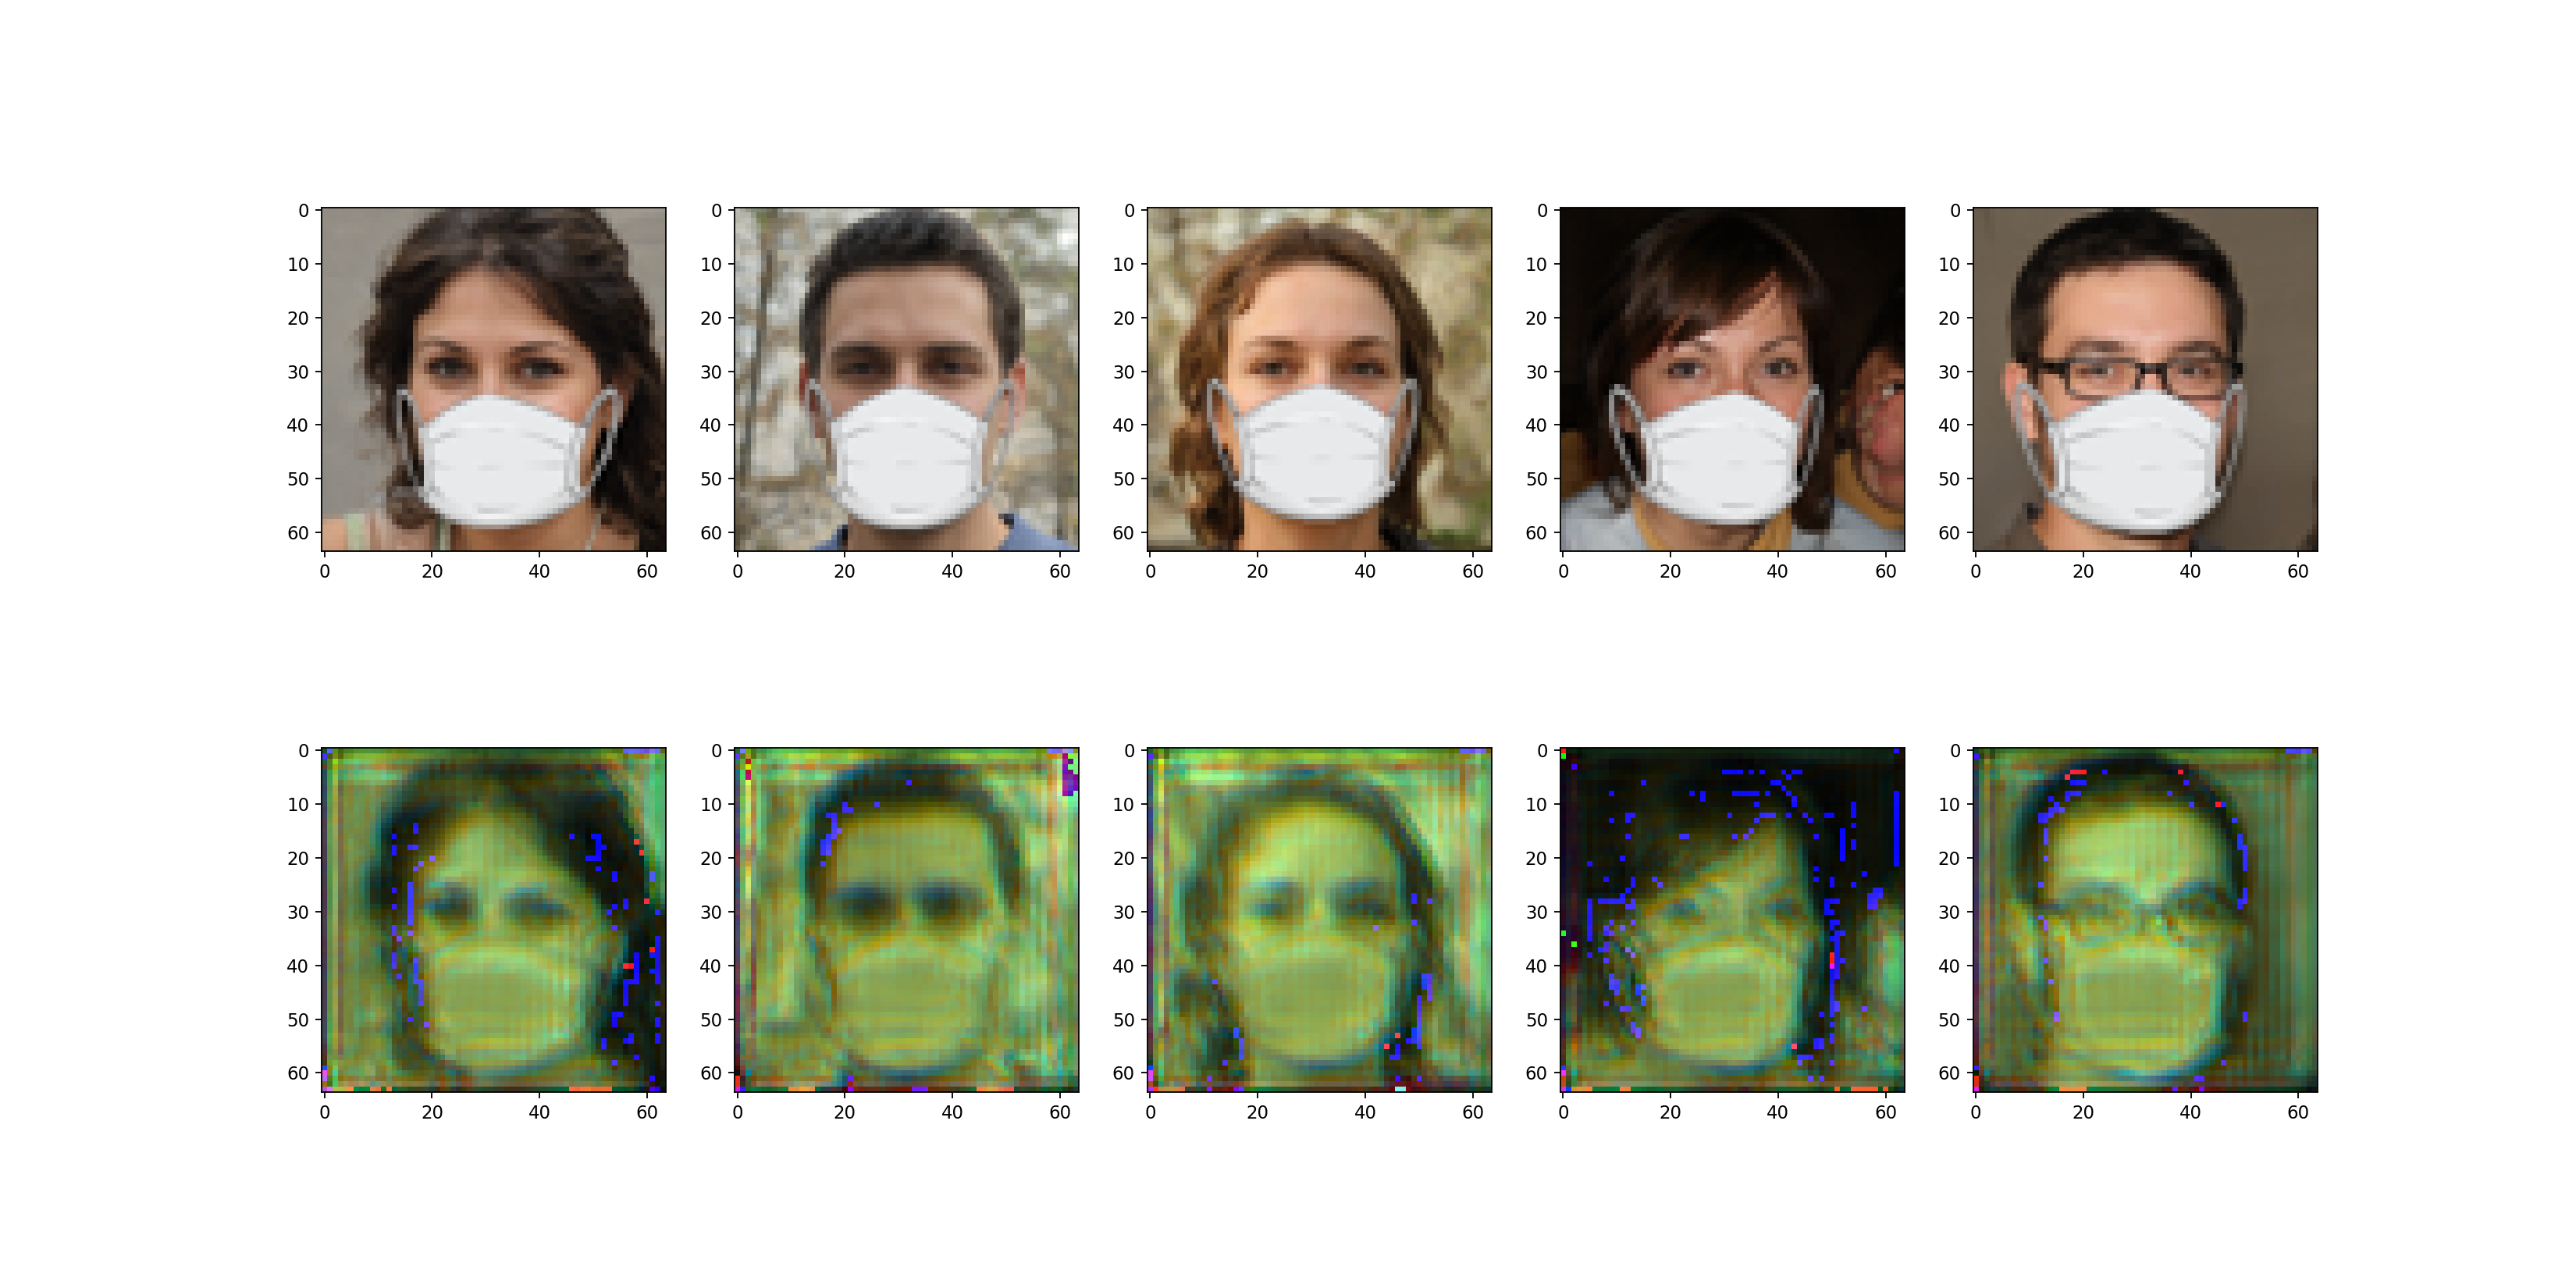

In [20]:
plot_results(X_test, y_pred)

<IPython.core.display.Javascript object>


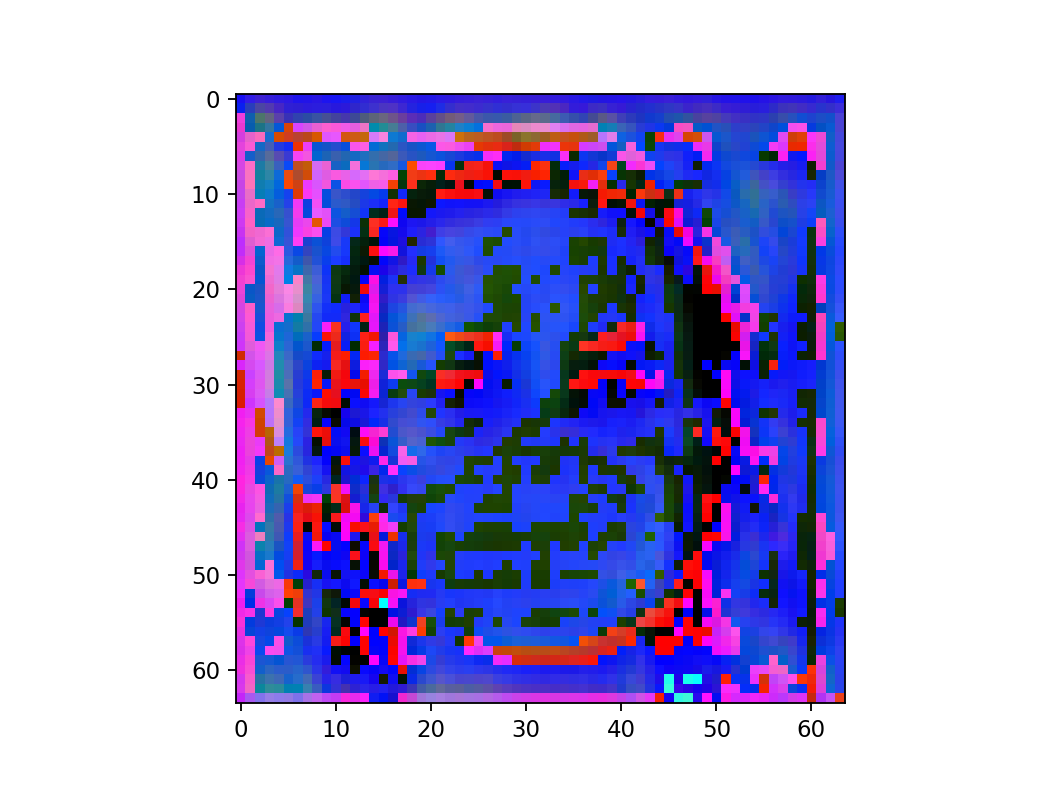

In [21]:
plt.plot(results.history['loss'])

In [1]:
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure(figsize=(3,3))
image_nb = 1
frames = []
for i in range(len(image_log)):
    frames.append([plt.imshow(image_log[i][1],animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)
plt.show()

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)


NameError: name 'plt' is not defined